In [1]:
#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
dataset_train = pd.read_csv("dataset/train.csv")
dataset_test = pd.read_csv("dataset/test.csv")

In [3]:
dataset_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1430  1431          60       RL         60.0    21930   Pave   NaN      IR3   
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
1432  1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1433  1434          60       RL         93.0    10261   Pave   NaN      IR1   
1434  1435          20       RL         80.0    17400   Pave   NaN      Reg   
1435  1436          20       RL         80.0     8400   Pave   NaN      Reg   
1436  1437          20       RL         60.0     9000   Pave   NaN      Reg   
1437  1438          20       RL         96.0    12444   Pave   NaN      Reg   
1438  1439          20       RM         90.0     7407   Pave   NaN      Reg   
1439  1440          60       RL         80.0    11584   Pave   NaN      Reg   
1440  1441          70       RL         79.0    11526   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1444  1445          20       RL         63.0     8500   Pave   NaN      Reg   
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pa

In [4]:
dataset_train.columns[dataset_train.isnull().any()]

Index([u'LotFrontage', u'Alley', u'MasVnrType', u'MasVnrArea', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2',
       u'Electrical', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
       u'MiscFeature'],
      dtype='object')

In [5]:
missing_values=dataset_train.isnull().sum()/len(dataset_train)
missing_values[missing_values>0].sort_values()

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

(array([ 75.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   3.]),
 array([ 0.        ,  0.09952055,  0.1990411 ,  0.29856164,  0.39808219,
         0.49760274,  0.59712329,  0.69664384,  0.79616438,  0.89568493,
         0.99520548]),
 <a list of 10 Patch objects>)

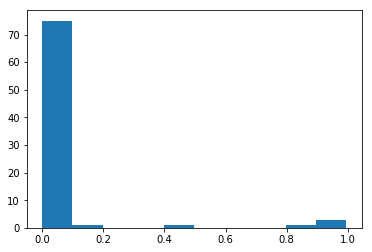

In [6]:
plt.hist(missing_values, histtype='bar')

count          Name
Name                                
Electrical    0.000685    Electrical
MasVnrType    0.005479    MasVnrType
MasVnrArea    0.005479    MasVnrArea
BsmtQual      0.025342      BsmtQual
BsmtCond      0.025342      BsmtCond
BsmtFinType1  0.025342  BsmtFinType1
BsmtExposure  0.026027  BsmtExposure
BsmtFinType2  0.026027  BsmtFinType2
GarageCond    0.055479    GarageCond
GarageQual    0.055479    GarageQual
GarageFinish  0.055479  GarageFinish
GarageType    0.055479    GarageType
GarageYrBlt   0.055479   GarageYrBlt
LotFrontage   0.177397   LotFrontage
FireplaceQu   0.472603   FireplaceQu
Fence         0.807534         Fence
Alley         0.937671         Alley
MiscFeature   0.963014   MiscFeature
PoolQC        0.995205        PoolQC

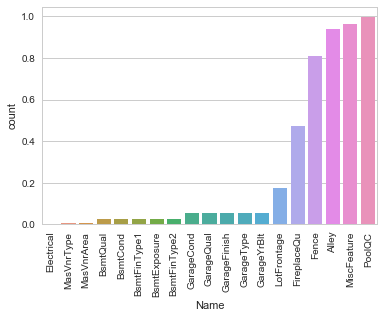

In [7]:
miss = missing_values[missing_values>0].sort_values().to_frame()

miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#plot the missing value count
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)


miss

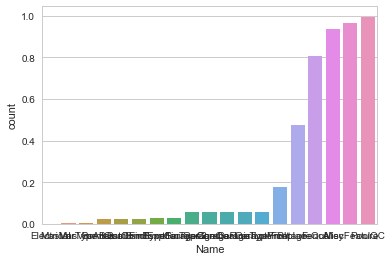

In [8]:
sns.barplot(x = 'Name', y = 'count', data=miss)

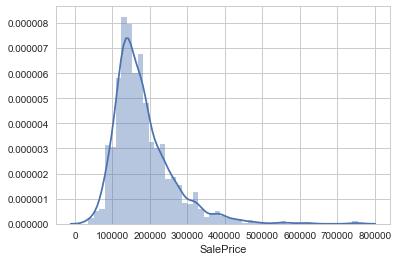

In [9]:
sns.distplot(dataset_train['SalePrice'])

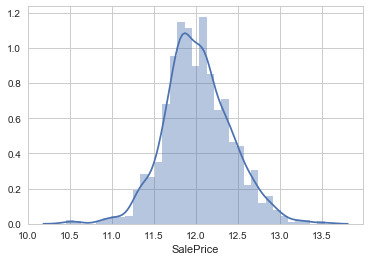

In [10]:
sns.distplot(np.log(dataset_train['SalePrice']))

In [11]:
numeric_data=dataset_train.select_dtypes(include=[np.number])
categorical_data=dataset_train.select_dtypes(exclude=[np.number])

In [12]:
numeric_data.shape

(1460, 38)

In [13]:
categorical_data.shape
sns.set(rc={'figure.figsize':(11.7,8.27)})

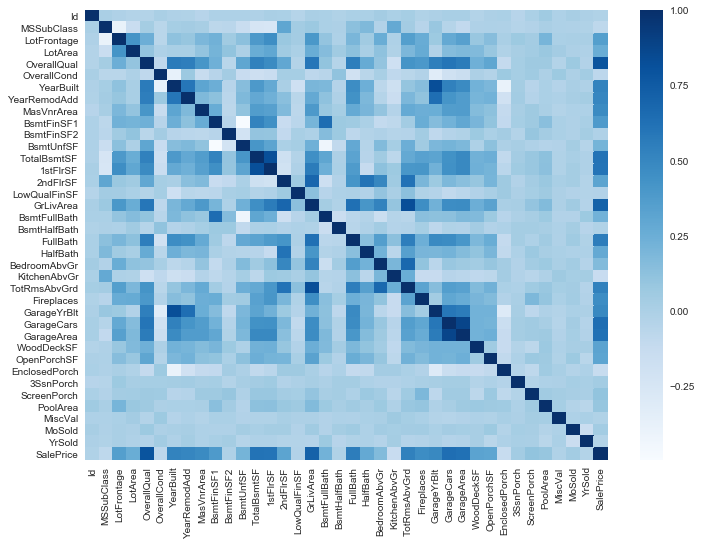

In [14]:

corr=numeric_data.corr()
sns.heatmap(corr, cmap="Blues")


In [15]:
print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n') #top 15 values

(SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64, '\n')


In [16]:
pivot_overallqual=dataset_train.pivot_table(values='SalePrice', index='OverallQual', aggfunc=np.median)

In [17]:
pivot_overallqual

SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390

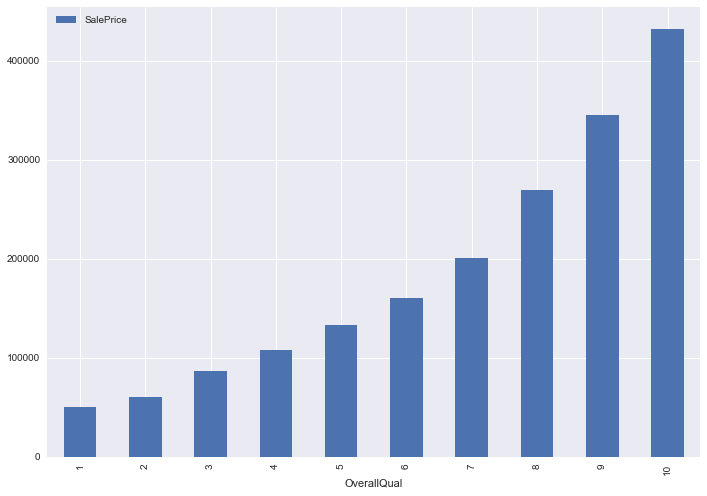

In [18]:
pivot_overallqual.plot(kind='bar')

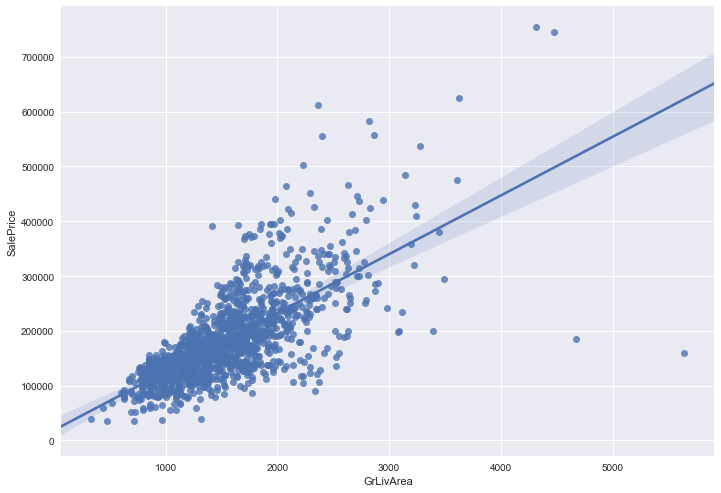

In [19]:
sns.regplot(dataset_train['GrLivArea'], dataset_train['SalePrice'])

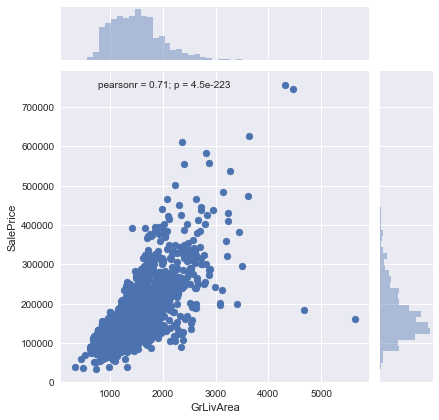

In [20]:
sns.jointplot(dataset_train['GrLivArea'], dataset_train['SalePrice'])

In [21]:
pivot_garagecars=dataset_train.pivot_table(values='SalePrice', index='GarageCars', aggfunc=np.median)

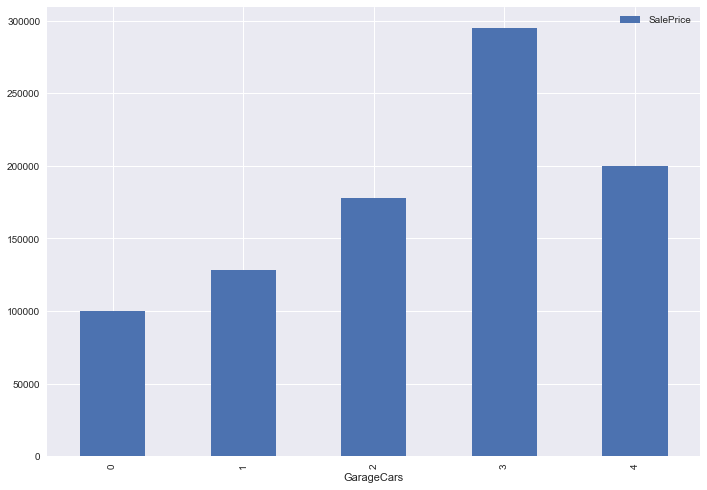

In [22]:
pivot_garagecars.plot(kind='bar')

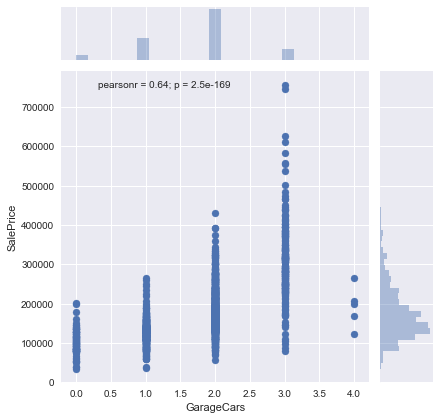

In [23]:
sns.jointplot(dataset_train['GarageCars'], dataset_train['SalePrice'])

In [24]:
categorical_data.describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1460         1460       1460      ...            1379   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1382          225       1260      ...             870   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1379       1379       1379       1460      7    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Gd  MnPrv   
freq            605       1311       1326       1340      3    157   

       MiscFeature SaleType SaleCondition  
count           54     1460          1460  
unique           4        9             6  
top           Shed       WD        Normal  
freq            49     1267          1198  

[4 rows x 43 columns]

In [27]:
categorical_data['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'], dtype=object)

In [36]:
cat = [f for f in dataset_train.columns if dataset_train.dtypes[f] == 'object']
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [35]:
cat2= [f for f in categorical_data.columns]
cat2

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [33]:
dataset_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [43]:
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  print(frame[c])  
                  s = frame[frame[c] == cls]['SalePrice'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

In [44]:
categorical_data['SalePrice'] = dataset_train.SalePrice.values
k = anova(categorical_data) 

/Users/maxim/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0       RL
1       RL
2       RL
3       RL
4       RL
5       RL
6       RL
7       RL
8       RM
9       RL
10      RL
11      RL
12      RL
13      RL
14      RL
15      RM
16      RL
17      RL
18      RL
19      RL
20      RL
21      RM
22      RL
23      RM
24      RL
25      RL
26      RL
27      RL
28      RL
29      RM
        ..
1430    RL
1431    RL
1432    RL
1433    RL
1434    RL
1435    RL
1436    RL
1437    RL
1438    RM
1439    RL
1440    RL
1441    RM
1442    FV
1443    RL
1444    RL
1445    RL
1446    RL
1447    RL
1448    RL
1449    RM
1450    RL
1451    RL
1452    RM
1453    RL
1454    FV
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object
0       RL
1       RL
2       RL
3       RL
4       RL
5       RL
6       RL
7       RL
8       RM
9       RL
10      RL
11      RL
12      RL
13      RL
14      RL
15      RM
16      RL
17      RL
18      RL
19      RL
20      RL
21      RM
22      RL
23      RM
24      RL
25      RL

Name: Neighborhood, Length: 1460, dtype: object
0         Norm
1        Feedr
2         Norm
3         Norm
4         Norm
5         Norm
6         Norm
7         PosN
8       Artery
9       Artery
10        Norm
11        Norm
12        Norm
13        Norm
14        Norm
15        Norm
16        Norm
17        Norm
18        RRAe
19        Norm
20        Norm
21        Norm
22        Norm
23        Norm
24        Norm
25        Norm
26        Norm
27        Norm
28        Norm
29       Feedr
         ...  
1430      RRAn
1431      Norm
1432      Norm
1433      Norm
1434      Norm
1435      Norm
1436      Norm
1437      Norm
1438    Artery
1439      Norm
1440      Norm
1441      Norm
1442      Norm
1443      Norm
1444      Norm
1445      Norm
1446      Norm
1447      Norm
1448      Norm
1449      Norm
1450      Norm
1451      Norm
1452      Norm
1453      Norm
1454      Norm
1455      Norm
1456      Norm
1457      Norm
1458      Norm
1459      Norm
Name: Condition1, Length: 1460, dtype

0       VinylSd
1       MetalSd
2       VinylSd
3       Wd Sdng
4       VinylSd
5       VinylSd
6       VinylSd
7       HdBoard
8       BrkFace
9       MetalSd
10      HdBoard
11      WdShing
12      HdBoard
13      VinylSd
14      MetalSd
15      Wd Sdng
16      Wd Sdng
17      MetalSd
18      VinylSd
19      BrkFace
20      VinylSd
21      Wd Sdng
22      VinylSd
23      CemntBd
24      Plywood
25      VinylSd
26      Wd Sdng
27      VinylSd
28      MetalSd
29      MetalSd
         ...   
1430    VinylSd
1431    Plywood
1432    Wd Sdng
1433    VinylSd
1434    BrkFace
1435    Wd Sdng
1436    HdBoard
1437    VinylSd
1438    MetalSd
1439    HdBoard
1440    MetalSd
1441    VinylSd
1442    VinylSd
1443    Wd Sdng
1444    VinylSd
1445    VinylSd
1446    HdBoard
1447    VinylSd
1448    MetalSd
1449    CemntBd
1450    VinylSd
1451    CemntBd
1452    VinylSd
1453    VinylSd
1454    VinylSd
1455    VinylSd
1456    Plywood
1457    CemntBd
1458    MetalSd
1459    HdBoard
Name: Exterior1st, Lengt

0        TA
1        TA
2        TA
3        Gd
4        TA
5        TA
6        TA
7        TA
8        TA
9        TA
10       TA
11       TA
12       TA
13       TA
14       TA
15       TA
16       TA
17      NaN
18       TA
19       TA
20       TA
21       TA
22       TA
23       TA
24       TA
25       TA
26       TA
27       TA
28       TA
29       TA
       ... 
1430     Gd
1431     TA
1432     TA
1433     TA
1434     TA
1435     TA
1436     TA
1437     TA
1438     TA
1439     TA
1440     TA
1441     TA
1442     TA
1443     TA
1444     TA
1445     TA
1446     TA
1447     TA
1448     TA
1449     TA
1450     TA
1451     TA
1452     TA
1453     TA
1454     TA
1455     TA
1456     TA
1457     Gd
1458     TA
1459     TA
Name: BsmtCond, Length: 1460, dtype: object
0        No
1        Gd
2        Mn
3        No
4        Av
5        No
6        Av
7        Mn
8        No
9        No
10       No
11       No
12       No
13       Av
14       No
15       No
16       No
17      NaN
18      

Name: FireplaceQu, Length: 1460, dtype: object
0       NaN
1        TA
2        TA
3        Gd
4        TA
5       NaN
6        Gd
7        TA
8        TA
9        TA
10      NaN
11       Gd
12      NaN
13       Gd
14       Fa
15      NaN
16       TA
17      NaN
18      NaN
19      NaN
20       Gd
21       Gd
22       Gd
23       TA
24       TA
25       Gd
26      NaN
27       Gd
28       Gd
29      NaN
       ... 
1430     Gd
1431    NaN
1432    NaN
1433     TA
1434     Gd
1435     Gd
1436    NaN
1437     Gd
1438    NaN
1439     TA
1440     Gd
1441     TA
1442     Ex
1443     Gd
1444    NaN
1445    NaN
1446    NaN
1447     TA
1448    NaN
1449    NaN
1450    NaN
1451     Gd
1452    NaN
1453    NaN
1454    NaN
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object
0       NaN
1        TA
2        TA
3        Gd
4        TA
5       NaN
6        Gd
7        TA
8        TA
9        TA
10      NaN
11       Gd
12      NaN
13       Gd
14    

0        Normal
1        Normal
2        Normal
3       Abnorml
4        Normal
5        Normal
6        Normal
7        Normal
8       Abnorml
9        Normal
10       Normal
11      Partial
12       Normal
13      Partial
14       Normal
15       Normal
16       Normal
17       Normal
18       Normal
19      Abnorml
20      Partial
21       Normal
22       Normal
23       Normal
24       Normal
25       Normal
26       Normal
27       Normal
28       Normal
29       Normal
         ...   
1430     Normal
1431     Normal
1432     Normal
1433     Normal
1434     Normal
1435    Abnorml
1436     Normal
1437    Partial
1438     Normal
1439     Normal
1440     Normal
1441     Normal
1442     Normal
1443     Normal
1444     Normal
1445     Normal
1446     Normal
1447     Normal
1448     Normal
1449    Abnorml
1450     Normal
1451    Partial
1452     Normal
1453    Abnorml
1454     Normal
1455     Normal
1456     Normal
1457     Normal
1458     Normal
1459     Normal
Name: SaleCondition, Len